In [1]:
# Importing Pandas
import pandas as pd

# importing plt
import matplotlib.pyplot as plt

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the pre processed file back 
Pre_Processed_Dataset = pd.read_csv('Pre_Processed_Dataset.csv')
Pre_Processed_Dataset = Pre_Processed_Dataset.drop(233921)
Pre_Processed_Dataset.reset_index(inplace = True, drop = True)


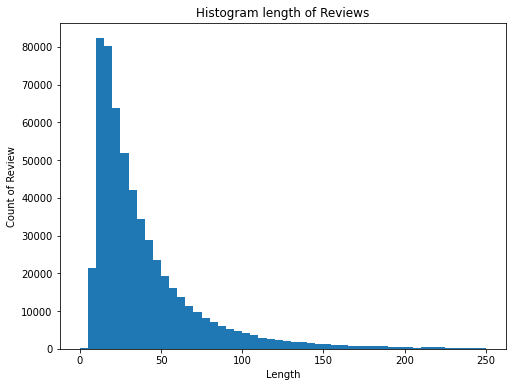

In [3]:
# plotting histogram about lengths of reviews
fig, ax = plt.subplots(figsize =(8, 6))
ax.hist(Pre_Processed_Dataset['Length'], bins = [x for x in range(0,251,5)])
plt.title("Histogram length of Reviews")
plt.xlabel("Length")
plt.ylabel("Count of Review")
plt.show()

In [4]:
# finding count of unique words
Unique_Words = set()
for Temp_Review in Pre_Processed_Dataset['Review']:
    for Temp_Word in Temp_Review.split():
        Unique_Words.add(Temp_Word)
print("Total Count of Unique Words ->", len(Unique_Words))


Total Count of Unique Words -> 80097


In [5]:
# counting words
Instance_List = list(Pre_Processed_Dataset['Rating'])
print("Review for Rating 1 ->", Instance_List.count(1))
print("Review for Rating 2 ->", Instance_List.count(2))
print("Review for Rating 3 ->", Instance_List.count(3))
print("Review for Rating 4 ->", Instance_List.count(4))
print("Review for Rating 5 ->", Instance_List.count(5))
print("So if we need to keep the data un biased the last entry i can take is 29743 X 5 (29743 from each rating)")


Review for Rating 1 -> 52264
Review for Rating 2 -> 29743
Review for Rating 3 -> 42638
Review for Rating 4 -> 80655
Review for Rating 5 -> 363110
So if we need to keep the data un biased the last entry i can take is 29743 X 5 (29743 from each rating)


In [6]:
# importing required libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM,SpatialDropout1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Embedding

In [7]:
# setting bag size list
#List_Size_Of_Bags = [1000, 2000]
List_Size_Of_Bags = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

# data size
# List_Data_Size = [5000, 10000]
List_Data_Size = [5000, 10000, 15000, 20000, 25000]


In [8]:
# list to save accuracies
Lis_of_Accuracies = []

# takign size of data 
for Data_Size in List_Data_Size:

    # lopping all bag size
    for Bag_Size in List_Size_Of_Bags:

        # print bag size
        print("Selected Bag Size ->", Bag_Size)
        print("Data size ",Data_Size," X 5 -> ", Data_Size*5, sep="")
        
        # creating segments
        Data_Segment_1 = Pre_Processed_Dataset[Pre_Processed_Dataset['Rating'] == 1].iloc[:Data_Size,:]
        Data_Segment_2 = Pre_Processed_Dataset[Pre_Processed_Dataset['Rating'] == 2].iloc[:Data_Size,:]
        Data_Segment_3 = Pre_Processed_Dataset[Pre_Processed_Dataset['Rating'] == 3].iloc[:Data_Size,:]
        Data_Segment_4 = Pre_Processed_Dataset[Pre_Processed_Dataset['Rating'] == 4].iloc[:Data_Size,:]
        Data_Segment_5 = Pre_Processed_Dataset[Pre_Processed_Dataset['Rating'] == 5].iloc[:Data_Size,:]
        
        # makign new dataframe
        New_Instance_dataframe = frames = pd.concat([Data_Segment_1, Data_Segment_2, Data_Segment_3, Data_Segment_4, Data_Segment_5])
        New_Instance_dataframe.reset_index(inplace = True, drop = True)
        
        # setting features 
        Features_Collection = New_Instance_dataframe['Review']

        # setting labels 
        Label_Collection = New_Instance_dataframe['Rating']
        
        # making the word bag
        cv = CountVectorizer(max_features = Bag_Size)
        Instance_Features = cv.fit_transform(Features_Collection).toarray()
        Instance_Features = pd.DataFrame(Instance_Features)
        
        # Splitting the dataset into the Training set and Test set
        features_train, features_test, labels_train, labels_test = train_test_split(Instance_Features, Label_Collection, test_size = 0.10, random_state = 123)
        
        # kneighbor classifer
        classifier = KNeighborsClassifier()
        classifier.fit(features_train, labels_train)
        Score_1 = classifier.score(features_test,labels_test)
        print("Score of KNeighborsClassifier is ",round(Score_1,2))
        
        # logistic regression
        classifier = LogisticRegression()
        classifier.fit(features_train, labels_train)
        Score_2 = classifier.score(features_test,labels_test)
        print("Score of Logistic regression is ",round(Score_2,2))
        
        classifier = RandomForestClassifier()
        classifier.fit(features_train, labels_train)  
        Score_3 = classifier.score(features_test,labels_test)
        print("Score of Random Forest is ",round(Score_3,2))
        
        # decision tree classifier
        classifier = DecisionTreeClassifier() 
        classifier.fit(features_train, labels_train) 
        Score_4 = classifier.score(features_test,labels_test)
        print("Score of Decision tree is ",round(Score_4,2))
        
        


        # end
        Lis_of_Accuracies.append([Data_Size, Bag_Size, Score_1, Score_2, Score_3, Score_4])
        print()


Selected Bag Size -> 500
Data size 5000 X 5 -> 25000
Score of KNeighborsClassifier is  0.31
Score of Logistic regression is  0.48
Score of Random Forest is  0.51
Score of Decision tree is  0.41

Selected Bag Size -> 1000
Data size 5000 X 5 -> 25000
Score of KNeighborsClassifier is  0.31
Score of Logistic regression is  0.51
Score of Random Forest is  0.52
Score of Decision tree is  0.42

Selected Bag Size -> 1500
Data size 5000 X 5 -> 25000
Score of KNeighborsClassifier is  0.32
Score of Logistic regression is  0.51
Score of Random Forest is  0.52
Score of Decision tree is  0.42

Selected Bag Size -> 2000
Data size 5000 X 5 -> 25000
Score of KNeighborsClassifier is  0.32
Score of Logistic regression is  0.52
Score of Random Forest is  0.51
Score of Decision tree is  0.42

Selected Bag Size -> 2500
Data size 5000 X 5 -> 25000
Score of KNeighborsClassifier is  0.33
Score of Logistic regression is  0.51
Score of Random Forest is  0.54
Score of Decision tree is  0.41

Selected Bag Size -> 

Score of Random Forest is  0.61
Score of Decision tree is  0.53

Selected Bag Size -> 1500
Data size 25000 X 5 -> 125000
Score of KNeighborsClassifier is  0.42
Score of Logistic regression is  0.52
Score of Random Forest is  0.62
Score of Decision tree is  0.53

Selected Bag Size -> 2000
Data size 25000 X 5 -> 125000
Score of KNeighborsClassifier is  0.42
Score of Logistic regression is  0.52
Score of Random Forest is  0.62
Score of Decision tree is  0.53

Selected Bag Size -> 2500
Data size 25000 X 5 -> 125000
Score of KNeighborsClassifier is  0.42
Score of Logistic regression is  0.53
Score of Random Forest is  0.62
Score of Decision tree is  0.53

Selected Bag Size -> 3000
Data size 25000 X 5 -> 125000
Score of KNeighborsClassifier is  0.42
Score of Logistic regression is  0.53
Score of Random Forest is  0.62
Score of Decision tree is  0.53

Selected Bag Size -> 3500
Data size 25000 X 5 -> 125000
Score of KNeighborsClassifier is  0.42
Score of Logistic regression is  0.53
Score of R

In [9]:
# converting the results into datafrem
Results_Dataset = pd.DataFrame(Lis_of_Accuracies)

# setting the column names of the 
Results_Dataset.columns = ['Data Size', 'Bag Size', 'KNC', 'LR', 'RFC', 'DTC']

# dumping the results into the file 
Results_Dataset.to_csv('Results Data.csv',index=False)

In [1]:
import pandas as pd
pd.read_csv('Results Data.csv')

,Data Size,Bag Size,KNC,LR,RFC,DTC
0,5000,500,0.310800,0.483200,0.510000,0.413600
1,5000,1000,0.312400,0.512400,0.523200,0.418800
2,5000,1500,0.323200,0.514000,0.520400,0.419600
3,5000,2000,0.324800,0.516400,0.513600,0.418800
4,5000,2500,0.329200,0.514400,0.536800,0.413200
5,5000,3000,0.329200,0.523600,0.524000,0.426000
6,5000,3500,0.338800,0.518400,0.530000,0.418000
7,5000,4000,0.338400,0.518400,0.534000,0.420400
8,5000,4500,0.338000,0.519200,0.529600,0.420400
9,5000,5000,0.340000,0.522400,0.528400,0.413200


In [2]:
print("The best accuracy is achived on datasize 25000 and bag size 4000, i.e  KNeighborsClassifier 42.6400% , Logistic regression 53.61% , Random Forest 62.30% ,Decision tree 53.00%")

The best accuracy is achived on datasize 25000 and bag size 4000, i.e  KNeighborsClassifier 42.6400% , Logistic regression 53.61% , Random Forest 62.30% ,Decision tree 53.00%
